**Install all the packages required.**

In [ ]:
#download all the libraries 
!pip install gradio 
!pip install transformers
!pip install torch
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.9/19.9 MB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.1/288.1 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 k

**Importing the packages and the libraries**

In [ ]:
#import all the required libraries 
#Importing the Libraries
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import torch.nn.functional as F
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import nltk 
import string
import re
import io
from io import BytesIO
from wordcloud import WordCloud
from nltk.classify.scikitlearn import SklearnClassifier
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tag import pos_tag 
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import wordnet
from nltk.corpus import stopwords
%matplotlib inline


**Uploading the dataset file**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Sentiment_Analysis_dataset.csv to Sentiment_Analysis_dataset.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['Sentiment_Analysis_dataset.csv']))
df.head(5)

,User,Tweet
0,erinx3leannexo,spring break in plain city... it's snowing
1,HairByJess,@iamjazzyfizzle I wish I got to watch it with ...
2,merisssa,thought sleeping in was an option tomorrow but...
3,Pbearfox,@julieebaby awe i love you too!!!! 1 am here ...
4,DdubsShellBell,@JonathanRKnight Awww I soo wish I was there t...


In [ ]:
df.shape

(9700, 2)

**Pre-proccessing of tweets.
Removal of noise**

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#Removal and cleaning of text

hinglish_stop_words = set([
    "hai", "ho", "ko", "ka", "ki", "mein", "se", "ke", "kar", "kya",
    "aur", "par", "bhi", "toh", "ya", "nahi", "nahin", "hota", "hain",
    "main", "tu", "tum", "hum", "wo", "woh", "ye", "aisa", "aisi", "hamesha",
    "kuch", "jab", "jaise", "agar", "ab", "baat", "raha", "rahi", "rahe",
    "bahut", "thoda", "hota", "hoti", "hote", "kab", "fir", "sab", "thi",
    "tha", "wahi", "wohi", "accha", "acha", "achha", "bad", "bhala", "bura",
    "dil", "duniya", "ja", "jaa", "jao", "jaane", "jaana", "jaata", "jata",
    "kal", "log", "mil", "mile", "milta", "milte", "mujhe", "mujhko", "pari",
    "pyar", "sabse", "samay", "shayad", "soch", "tak", "tarah", "tera",
    "tumhara", "tumhe", "tumko", "tumse", "zindagi", "yaar", "teri", "meri",
    "uski", "uska", "apni", "apna",
])
stop_words = set(stopwords.words('english'))
def cleanTxt(text):
  text = re.sub(r'_' ,'', text) #Remove underscores
  text = re.sub(r'#' ,'', text) #Remove Hash
  text = re.sub(r'@[A-Za-z0-9]+' ,'', text) #Remove @
  text = re.sub(r'RT[\s]' ,'', text) #Remove Re-Tweets
  text = re.sub(r'https?:\/\/\S+' ,'', text) #Remove https
  # Remove punctuation
  translator = str.maketrans('', '', string.punctuation)
  text = text.translate(translator) 
  return text

def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_non_ascii(text):
    return ''.join([i if ord(i) < 128 else '' for i in text])

def lowercase_conversion(text):
  return text.lower()    

def removal_of_stop_words(text):
  tokens = word_tokenize(text)
  filtered_tweet = [word for word in tokens if word.lower() not in hinglish_stop_words and word.lower() not in stop_words]
  filtered_tweet = ' '.join(filtered_tweet)
  return filtered_tweet

df['Tweet'] = df['Tweet'].apply(lowercase_conversion)
df['Tweet'] = df['Tweet'].apply(cleanTxt)
df['Tweet'] = df['Tweet'].apply(remove_emoji)
df['Tweet'] = df['Tweet'].apply(remove_non_ascii)
df['Tweet'] = df['Tweet'].apply(removal_of_stop_words)
df.head(10)

,User,Tweet
0,erinx3leannexo,spring break plain city snowing
1,HairByJess,wish got watch miss premiere
2,merisssa,thought sleeping option tomorrow realizing eva...
3,Pbearfox,awe love 1 miss
4,DdubsShellBell,awww soo wish see finally comfortable im sad m...
5,CiaraRenee,need hug
6,xpika,life cool
7,ericg622,nice day rain comes tomorrow 5am
8,BrookeAmanda,really hate people diss bands trace clearly ugly
9,deelau,gym attire today puma singlet adidas shortsand...


In [ ]:
!pip install --upgrade pip
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 18.7 MB/s eta 0:00:00


**Instantiate the Model and calculate the Sentiment**

In [ ]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer,AutoConfig

In [ ]:
MODEL = f"cardiffnlp/twitter-xlm-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)

model = AutoModelForSequenceClassification.from_pretrained(MODEL)
tokenizer.save_pretrained(MODEL)
model.save_pretrained(MODEL)

classifier = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

X_train = [str(twt) for twt in df['Tweet']]
res = classifier(X_train, padding=True, truncation=True, max_length=512)

sentiments = [r['label'] for r in res]
scores = [r['score'] for r in res]


Xformers is not installed correctly. If you want to use memorry_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [ ]:
df['Sentiment'] = sentiments
df['Score'] = scores

In [ ]:
df.head(10)

,User,Tweet,Sentiment,Score
0,erinx3leannexo,spring break plain city snowing,neutral,0.406507
1,HairByJess,wish got watch miss premiere,neutral,0.440594
2,merisssa,thought sleeping option tomorrow realizing eva...,neutral,0.721458
3,Pbearfox,awe love 1 miss,positive,0.828165
4,DdubsShellBell,awww soo wish see finally comfortable im sad m...,negative,0.595452
5,CiaraRenee,need hug,negative,0.426293
6,xpika,life cool,positive,0.487169
7,ericg622,nice day rain comes tomorrow 5am,positive,0.716106
8,BrookeAmanda,really hate people diss bands trace clearly ugly,negative,0.946742
9,deelau,gym attire today puma singlet adidas shortsand...,neutral,0.800117


**Save the proccessed text**

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
# assume that you have a cleaned dataframe named 'clean_data'
df.to_csv('/content/drive/My Drive/Sentiment_Analysis_processed_dataset.csv', index=False)

Mounted at /content/drive


**Collecting valuable information about the processed dataset**

In [ ]:
# Create separate data frames for each sentiment
positive_df = df[df['Sentiment'] == 'positive'][['Tweet', 'Sentiment']]
neutral_df = df[df['Sentiment'] == 'neutral'][['Tweet', 'Sentiment']]
negative_df = df[df['Sentiment'] == 'negative'][['Tweet', 'Sentiment']]

% of +ve tweets in the dataset 30.784
% of -ve tweets in the dataset 38.34
% of neutral tweets in the dataset 30.876
Bar plots for the percentage of tweets.


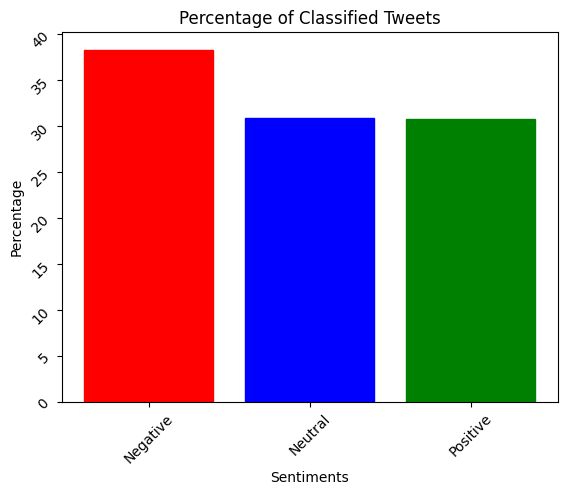

In [ ]:

#Get the % of +ve -ve and Neutral tweets
percentage_positive = round((positive_df.shape[0]/df.shape[0])*100, 3)
print("% of +ve tweets in the dataset",percentage_positive)


percentage_negative = round((negative_df.shape[0]/df.shape[0])*100, 3)
print("% of -ve tweets in the dataset",percentage_negative)


percentage_neutral = round((neutral_df.shape[0]/df.shape[0])*100, 3)
print("% of neutral tweets in the dataset",percentage_neutral)


print("Bar plots for the percentage of tweets.")
labels = ["Negative", "Neutral", "Positive"]
percentage = [percentage_negative, percentage_neutral, percentage_positive]

bars = plt.bar(labels, percentage)
bars[0].set_color('red')
bars[1].set_color('blue')
bars[2].set_color('green')

plt.title('Percentage of Classified Tweets')
plt.xlabel('Sentiments')
plt.ylabel('Percentage')
plt.tick_params(rotation=45)
plt.show()

Word Cloud for the entire dataset: 



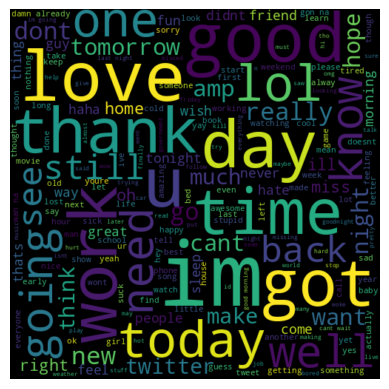

In [ ]:
print('Word Cloud for the entire dataset: \n')
allwords = ' '.join([twts for twts in df['Tweet']])
wordCloud = WordCloud(width=500, height=500, random_state=21, max_font_size=120).generate(allwords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()


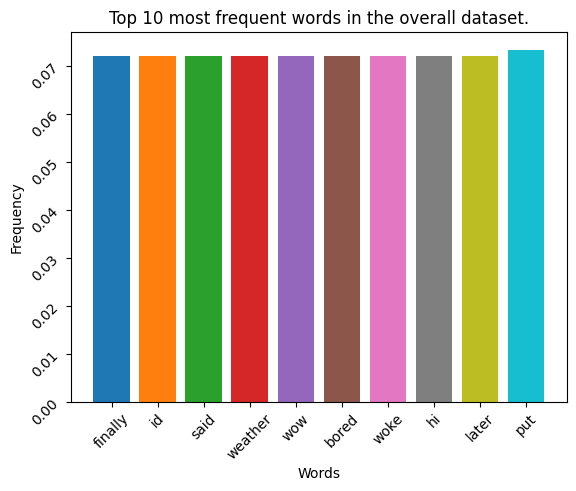

In [ ]:
word_freq = dict(wordCloud.words_)
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=False)
N = 10 # assume that you want to display the top 10 words
cnt = 0
for word, frequency in sorted_word_freq:
    plt.bar(word,frequency)
    cnt = cnt+1
    if(cnt==N):
      break

plt.title("Top 10 most frequent words in the overall dataset.")
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.tick_params(rotation=45)
plt.show()

Word Cloud for the positive dataset: 



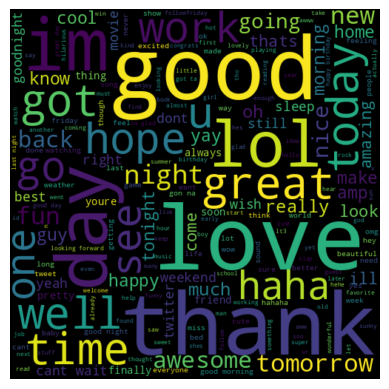

In [ ]:
print('Word Cloud for the positive dataset: \n')
allwords_positive = ' '.join([twts for twts in positive_df['Tweet']])
wordCloud_positive = WordCloud(width=500, height=500, random_state=21, max_font_size=120).generate(allwords_positive)
plt.imshow(wordCloud_positive, interpolation="bilinear")
plt.axis('off')
plt.show()

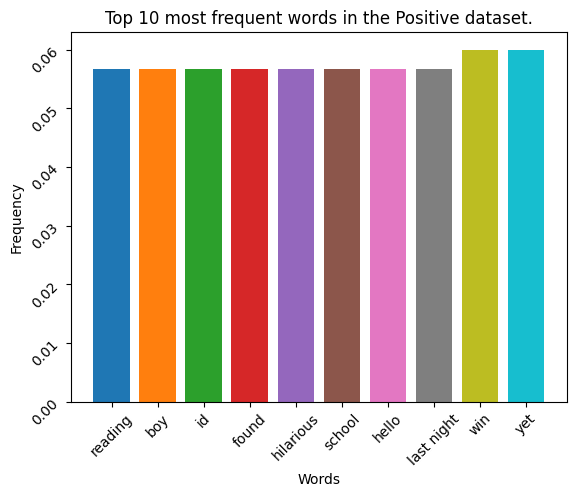

In [ ]:
word_freq = dict(wordCloud_positive.words_)
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=False)
N = 10 # assume that you want to display the top 10 words
cnt = 0
for word, frequency in sorted_word_freq:
    plt.bar(word,frequency)
    cnt = cnt+1
    if(cnt==N):
      break

plt.title("Top 10 most frequent words in the Positive dataset.")
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.tick_params(rotation=45)
plt.show()

Word Cloud for the negative dataset: 



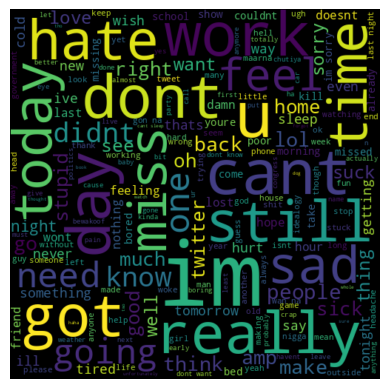

In [ ]:
print('Word Cloud for the negative dataset: \n')
allwords_negative = ' '.join([twts for twts in negative_df['Tweet']])
wordCloud_negative = WordCloud(width=500, height=500, random_state=21, max_font_size=120).generate(allwords_negative)
plt.imshow(wordCloud_negative, interpolation="bilinear")
plt.axis('off')
plt.show()


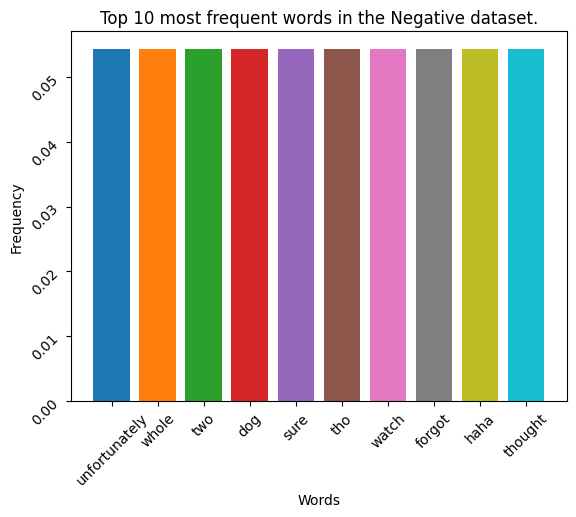

In [ ]:
word_freq = dict(wordCloud_negative.words_)
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=False)
N = 10 # assume that you want to display the top 10 words
cnt = 0
for word, frequency in sorted_word_freq:
    plt.bar(word,frequency)
    cnt = cnt+1
    if(cnt==N):
      break

plt.title("Top 10 most frequent words in the Negative dataset.")
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.tick_params(rotation=45)
plt.show()

Word Cloud for the nuetral dataset: 



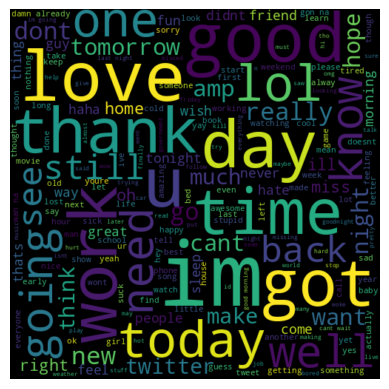

In [ ]:
print('Word Cloud for the nuetral dataset: \n')
allwords_neutral = ' '.join([twts for twts in neutral_df['Tweet']])
wordCloud_neutral = WordCloud(width=500, height=500, random_state=21, max_font_size=120).generate(allwords_neutral)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

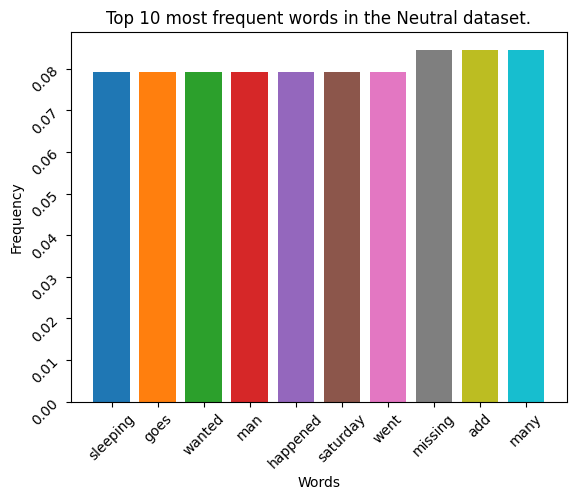

In [ ]:
word_freq = dict(wordCloud_neutral.words_)
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=False)
N = 10 # assume that you want to display the top 10 words
cnt = 0
for word, frequency in sorted_word_freq:
    plt.bar(word,frequency)
    cnt = cnt+1
    if(cnt==N):
      break

plt.title("Top 10 most frequent words in the Neutral dataset.")
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.tick_params(rotation=45)
plt.show()

**Applying different types of classification task on the training and test data sets**

In [ ]:
from sklearn.metrics import recall_score,precision_score
#making a list of classifiers with their names
classifiers=[]
#making a list of classifiers with their accuracy
accuracy_list=[]

In [ ]:
#Spliting into test data and train data
y=df["Sentiment"]
x=df.drop('Sentiment',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (7760, 3)
x_test:  (1940, 3)
y_train:  (7760,)
y_test:  (1940,)


In [ ]:
#creating test and train data frames
X_train = pd.DataFrame(columns=['Tweet'])
X_test = pd.DataFrame(columns=['Tweet'])
Y_train = []
Y_test = []
X_train = X_train.append(x_train)
for i in y_test:
    Y_test.append(i)
for i in y_train:
     Y_train.append(i)
X_test = X_test.append(x_test)

<ipython-input-36-054442a3ddf3>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(x_train)
<ipython-input-36-054442a3ddf3>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_test = X_test.append(x_test)


In [ ]:
#spliting into train sets for training 
training_set=[]
count=0
for i in (X_train["Tweet"]):
    training_set.append((i.split(),Y_train[count]))
    count+=1

def list_to_dict(words_list):
    return dict([(word, True) for word in words_list])

training_set_formatted = [(list_to_dict(element[0]), element[1]) for element in training_set]
training_set_formatted

[({'proud': True,
   'bentley': True,
   'boo': True,
   'knows': True,
   'sit': True,
   'stay': True,
   'lay': True,
   'newest': True,
   'accomplishment': True,
   'crawl': True,
   'awww': True},
  'positive'),
 ({'95': True, 'thats': True, 'guess': True}, 'neutral'),
 ({'congress': True}, 'neutral'),
 ({'thank': True,
   'know': True,
   'fact': True,
   'studied': True,
   'day': True,
   'night': True,
   'made': True,
   'sad': True},
  'negative'),
 ({'family': True,
   'sandusky': True,
   'cleveland': True,
   'brings': True,
   'back': True,
   'fond': True,
   'memories': True,
   'childhood': True},
  'positive'),
 ({}, 'negative'),
 ({'urging': True,
   'twittercrew': True,
   'join': True,
   'facebook': True,
   'get': True,
   'details': True,
   'twitter': True,
   'incase': True},
  'neutral'),
 ({'tired': True,
   'scared': True,
   'go': True,
   'bed': True,
   'think': True,
   'buggys': True,
   'thereewwww': True},
  'negative'),
 ({'book': True}, 'neutral'

In [ ]:
#spliting into test sets for testing
test_set=[]
count=0
for i in (X_test["Tweet"]):
    test_set.append((i.split(),Y_test[count]))
    count+=1    

def list_to_dict(words_list):
    return dict([(word, True) for word in words_list])
 

test_set_formatted= [(list_to_dict(element[0]), element[1]) for element in test_set]
test_set_formatted

[({'im': True, 'pretty': True, 'cool': True, 'know': True}, 'positive'),
 ({'back': True,
   'beantown': True,
   'yet': True,
   'isnt': True,
   'ur': True,
   'usual': True,
   'twitter': True,
   'time': True,
   'hope': True,
   'getting': True,
   'rest': True,
   'good': True,
   'night': True},
  'neutral'),
 ({'seems': True,
   'thought': True,
   'life': True,
   'story': True,
   'interesting': True,
   'anything': True,
   'say': True},
  'neutral'),
 ({'wtffffever': True,
   'please': True,
   'dont': True,
   'talk': True,
   'much': True,
   'go': True,
   'take': True,
   'shower': True},
  'negative'),
 ({'absolutely': True, 'hate': True, 'get': True, 'tweet': True}, 'negative'),
 ({'well': True,
   'obviosuly': True,
   'missed': True,
   'evcery': True,
   'single': True,
   'one': True},
  'negative'),
 ({'im': True,
   'boring': True,
   'really': True,
   'dont': True,
   'understand': True,
   'use': True},
  'negative'),
 ({'think': True, 'ate': True, 'chips': T

Naive Bayes Classifier

In [ ]:

#naive bayes classifier
classifier = nltk.NaiveBayesClassifier.train(training_set_formatted)

ground_truth = [r[1] for r in test_set_formatted]
preds = [classifier.classify(r[0]) for r in test_set_formatted]
f1score=f1_score(ground_truth, preds, labels = ['negative', 'neutral', 'positive'], average = 'micro')
recallscore=recall_score(ground_truth, preds, labels = ['negative', 'neutral', 'positive'], average = 'macro')
precisionscore=precision_score(ground_truth, preds, labels = ['negative', 'neutral','positive'], average = 'weighted')

#accuracy
print("Original Naive Bayes Algo accuracy percent:", (nltk.classify.accuracy(classifier, test_set_formatted))*100)
print("F1-score : ",100*f1score)
print("Recall Score : ",100*recallscore)
print("Precision Score : ",100*precisionscore)
print()

# classifier.show_most_informative_features(15)

classifiers.append([classifier,"naive bayes classifier"])

accuracy_list.append([(nltk.classify.accuracy(classifier, test_set_formatted))*100,"NB"])

# get unique classes in preds
classes = sorted(set(preds))

# update target_names to include all classes
target_names = classes

print("Original Naive Bayes\n")
print(classification_report(Y_test, preds, target_names=target_names))


Original Naive Bayes Algo accuracy percent: 65.4639175257732
F1-score :  65.4639175257732
Recall Score :  64.95537184638694
Precision Score :  65.97679823221331

Original Naive Bayes

              precision    recall  f1-score   support

    negative       0.65      0.78      0.71       752
     neutral       0.69      0.41      0.51       627
    positive       0.65      0.76      0.70       561

    accuracy                           0.65      1940
   macro avg       0.66      0.65      0.64      1940
weighted avg       0.66      0.65      0.64      1940



Multinomial Naive Bayes

In [ ]:
#Multinomail naive bayes
MNB_clf = SklearnClassifier(MultinomialNB())
MNB_clf.train(training_set_formatted)
print("Multinomail naive bayes classifier accuracy percent:", (nltk.classify.accuracy(MNB_clf, test_set_formatted))*100)

ground_truth = [r[1] for r in test_set_formatted]
preds = [MNB_clf.classify(r[0]) for r in test_set_formatted]
f1score=f1_score(ground_truth, preds, labels = ['negative', 'neutral', 'positive'], average = 'micro')
recallscore=recall_score(ground_truth, preds, labels = ['negative', 'neutral', 'positive'], average = 'macro')
precisionscore=precision_score(ground_truth, preds, labels = ['negative', 'neutral', 'positive'], average = 'weighted')

print("F1-score : ",100*f1score)
print("Recall Score : ",100*recallscore)
print("Precision Score : ",100*precisionscore)

accuracy_list.append([(nltk.classify.accuracy(MNB_clf, test_set_formatted))*100,"MNB"])

classifiers.append([MNB_clf,"Multinomail naive bayes classifier"])


print("Multinomail naive bayes\n")
# get unique classes in preds
classes = sorted(set(preds))

# update target_names to include all classes
target_names = classes
print(classification_report(Y_test, preds, target_names=target_names))

Multinomail naive bayes classifier accuracy percent: 67.16494845360825
F1-score :  67.16494845360825
Recall Score :  66.71710185312715
Precision Score :  67.31614741819652
Multinomail naive bayes

              precision    recall  f1-score   support

    negative       0.66      0.79      0.72       752
     neutral       0.68      0.45      0.54       627
    positive       0.68      0.76      0.72       561

    accuracy                           0.67      1940
   macro avg       0.67      0.67      0.66      1940
weighted avg       0.67      0.67      0.66      1940



In [ ]:
#Bernouli naive bayes
BNB_clf = SklearnClassifier(BernoulliNB())
BNB_clf.train(training_set_formatted)
print("Bernoulli naive bayes classifier accuracy percent:", (nltk.classify.accuracy(BNB_clf, test_set_formatted))*100)

ground_truth = [r[1] for r in test_set_formatted]
preds = [BNB_clf.classify(r[0]) for r in test_set_formatted]
f1score=f1_score(ground_truth, preds, labels = ['negative', 'neutral', 'positive'], average = 'micro')
recallscore=recall_score(ground_truth, preds, labels = ['negative', 'neutral', 'positive'], average = 'macro')
precisionscore=precision_score(ground_truth, preds, labels = ['negative', 'neutral', 'positive'], average = 'weighted')

print("F1-score : ",100*f1score)
print("Recall Score : ",100*recallscore)
print("Precision Score : ",100*precisionscore)

accuracy_list.append([(nltk.classify.accuracy(BNB_clf, test_set_formatted))*100,"BNB"])

classifiers.append([BNB_clf,"Bernouli classifier"])

print("Bernouli naive bayes\n")
# get unique classes in preds
classes = sorted(set(preds))

# update target_names to include all classes
target_names = classes
print(classification_report(Y_test, preds, target_names=target_names))

Bernoulli naive bayes classifier accuracy percent: 67.88659793814433
F1-score :  67.88659793814433
Recall Score :  67.34622341589933
Precision Score :  67.97686411799884
Bernouli naive bayes

              precision    recall  f1-score   support

    negative       0.66      0.79      0.72       752
     neutral       0.67      0.50      0.57       627
    positive       0.72      0.73      0.73       561

    accuracy                           0.68      1940
   macro avg       0.68      0.67      0.67      1940
weighted avg       0.68      0.68      0.67      1940



In [ ]:
#Logistic regression
LogReg_clf = SklearnClassifier(LogisticRegression())
LogReg_clf.train(training_set_formatted)
print("Logistic Regression classifier accuracy percent:", (nltk.classify.accuracy(LogReg_clf, test_set_formatted))*100)

ground_truth = [r[1] for r in test_set_formatted]
preds = [LogReg_clf.classify(r[0]) for r in test_set_formatted]
f1score=f1_score(ground_truth, preds, labels = ['negative', 'neutral', 'positive'], average = 'micro')
recallscore=recall_score(ground_truth, preds, labels = ['negative', 'neutral', 'positive'], average = 'macro')
precisionscore=precision_score(ground_truth, preds, labels = ['negative', 'neutral', 'positive'], average = 'weighted')

print("F1-score : ",100*f1score)
print("Recall Score : ",100*recallscore)
print("Precision Score : ",100*precisionscore)

accuracy_list.append([(nltk.classify.accuracy(LogReg_clf, test_set_formatted))*100,"LogReg"])


classifiers.append([LogReg_clf,"Bernouli LogisticRegression_classifier"])

print("Logistic regression\n")
# get unique classes in preds
classes = sorted(set(preds))

# update target_names to include all classes
target_names = classes
print(classification_report(Y_test, preds, target_names=target_names))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression classifier accuracy percent: 72.42268041237114
F1-score :  72.42268041237114
Recall Score :  72.58865913598804
Precision Score :  72.87545497481052
Logistic regression

              precision    recall  f1-score   support

    negative       0.77      0.71      0.74       752
     neutral       0.65      0.73      0.69       627
    positive       0.76      0.74      0.75       561

    accuracy                           0.72      1940
   macro avg       0.73      0.73      0.73      1940
weighted avg       0.73      0.72      0.73      1940



In [ ]:
#Support vector classifier 
SVC_clf = SklearnClassifier(SVC())
SVC_clf.train(training_set_formatted)
print("Support vector classifier accuracy percent:", (nltk.classify.accuracy(SVC_clf, test_set_formatted))*100)

ground_truth = [r[1] for r in test_set_formatted]
preds = [SVC_clf.classify(r[0]) for r in test_set_formatted]
f1score=f1_score(ground_truth, preds, labels = ['negative', 'neutral', 'positive'], average = 'micro')
recallscore=recall_score(ground_truth, preds, labels = ['negative', 'neutral', 'positive'], average = 'macro')
precisionscore=precision_score(ground_truth, preds, labels = ['negative', 'neutral', 'positive'], average = 'weighted')

print("F1-score : ",100*f1score)
print("Recall Score : ",100*recallscore)
print("Precision Score : ",100*precisionscore)

accuracy_list.append([(nltk.classify.accuracy(SVC_clf, test_set_formatted))*100,"SVC"])

classifiers.append([SVC_clf,"SVC classifier"])

print("Support vector classifier\n")
# get unique classes in preds
classes = sorted(set(preds))

# update target_names to include all classes
target_names = classes
print(classification_report(Y_test, preds, target_names=target_names))

Support vector classifier accuracy percent: 70.30927835051546
F1-score :  70.30927835051546
Recall Score :  70.47352934522752
Precision Score :  71.27889500287954
Support vector classifier

              precision    recall  f1-score   support

    negative       0.75      0.67      0.71       752
     neutral       0.62      0.74      0.67       627
    positive       0.78      0.70      0.73       561

    accuracy                           0.70      1940
   macro avg       0.71      0.70      0.71      1940
weighted avg       0.71      0.70      0.70      1940



In [ ]:
from collections import Counter
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report

def ensemble_classifier(classifiers, test_set):
    ensemble_preds = []
    
    for features in test_set:
        preds = [clf.classify(features[0]) for clf in classifiers]
        majority_vote = Counter(preds).most_common(1)[0][0]
        ensemble_preds.append(majority_vote)
    
    return ensemble_preds

# List of classifiers and their names
classifiers = [
    [SVC_clf, "SVC"],
    [LogReg_clf, "Logistic Regression"],
    [BNB_clf, "Bernoulli Naive Bayes"],
    [MNB_clf, "Multinomial Naive Bayes"],
    [classifier, "Naive Bayes"]
]

# Ensembling the classifiers
ensemble_preds = ensemble_classifier([clf[0] for clf in classifiers], test_set_formatted)

# Evaluation metrics for the ensemble
ground_truth = [r[1] for r in test_set_formatted]

accuracy_esb = accuracy_score(ground_truth, ensemble_preds)
f1score = f1_score(ground_truth, ensemble_preds, labels=['negative', 'neutral','positive'], average='micro')
recallscore = recall_score(ground_truth, ensemble_preds, labels=['negative', 'neutral','positive'], average='macro')
precisionscore = precision_score(ground_truth, ensemble_preds, labels=['negative', 'neutral','positive'], average='weighted')

print("Ensemble accuracy percent:", accuracy_esb * 100)
print("F1-score:", 100 * f1score)
print("Recall Score:", 100 * recallscore)
print("Precision Score:", 100 * precisionscore)

accuracy_list.append([(accuracy_esb * 100), "Ensemble"])
# print(type(accuracy))

# Classification report
target_names = ['negative', 'neutral','positive']
print(classification_report(ground_truth, ensemble_preds, target_names=target_names))


Ensemble accuracy percent: 68.81443298969072
F1-score: 68.81443298969072
Recall Score: 68.35319717829105
Precision Score: 68.93332482064474
              precision    recall  f1-score   support

    negative       0.67      0.79      0.72       752
     neutral       0.69      0.52      0.59       627
    positive       0.71      0.75      0.73       561

    accuracy                           0.69      1940
   macro avg       0.69      0.68      0.68      1940
weighted avg       0.69      0.69      0.68      1940



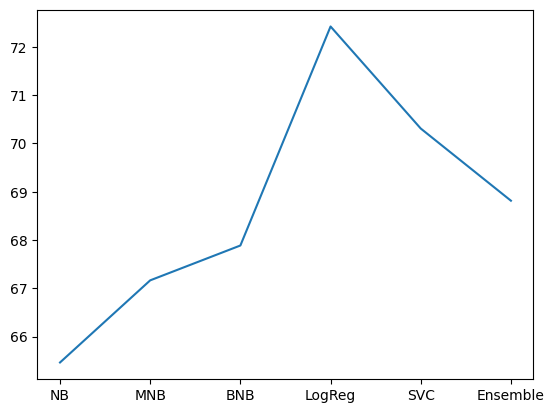

In [ ]:

from matplotlib import pyplot as plt 
import numpy as np
  
# x-axis values 
x=[]
for i in accuracy_list:
    x.append(i[0])

# Y-axis values 
y = []
for i in accuracy_list:
    y.append(i[1])

# Function to plot 
plt.plot(y,x) 

  
# function to show the plot 
plt.show()


Confusion matrix, without normalization
[[507 182  63]
 [111 467  49]
 [ 62 109 390]]
Normalized confusion matrix
[[0.67 0.24 0.08]
 [0.18 0.74 0.08]
 [0.11 0.19 0.7 ]]


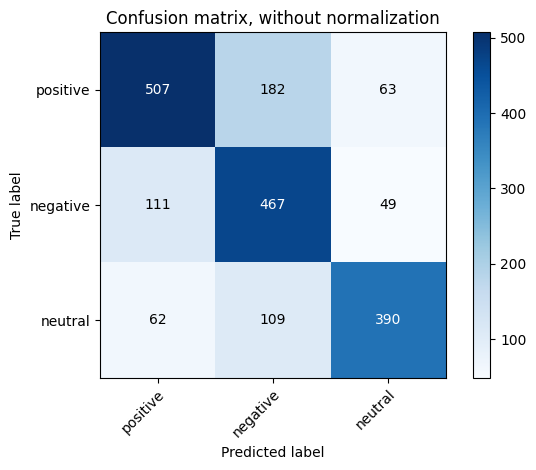

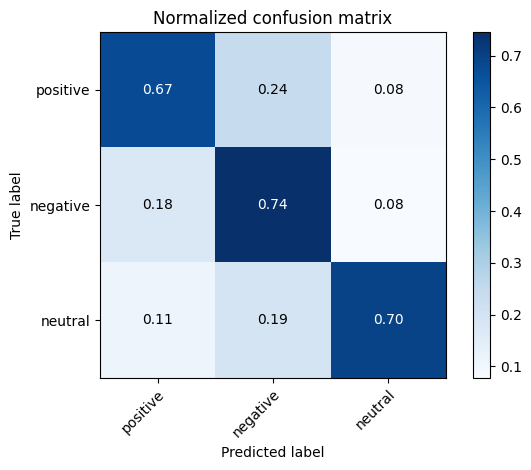

In [ ]:

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels



class_names = [ 'positive','negative', 'neutral']



def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(Y_test, preds, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(Y_test, preds, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


**Interface**

In [ ]:
model_path = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
sentiment_task = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)


In [ ]:
def sentiment_analysis_CM(utterance):
  return sentiment_task(utterance)

In [ ]:

import gradio as gr
descriptions = "This is an AI sentiment analyzer which checks and gets the emotions in a particular utterance. Just put in a sentence (Hindi, English or Codemixed) and you'll get the probable emotions behind that sentence"

app = gr.Interface(fn=sentiment_analysis_CM, inputs="text", outputs="text", title="Sentiment Analayser", description=descriptions)
app.launch(debug=True, share=True)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://6263a1dafb2dcfc1f0.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
